In [15]:
import sys
sys.path.append('../src/')

## Read all sensor data

In [16]:
# Contains as key the sensor name and as value the complete data
from SmartCityHelper.Data import getAllSensors

sensorData = getAllSensors()


## Visualize Sensors

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

from SmartCityHelper.Filter import filterDateRange
import datetime
from SmartCityHelper.Reducer import avgReducer, sumReducer


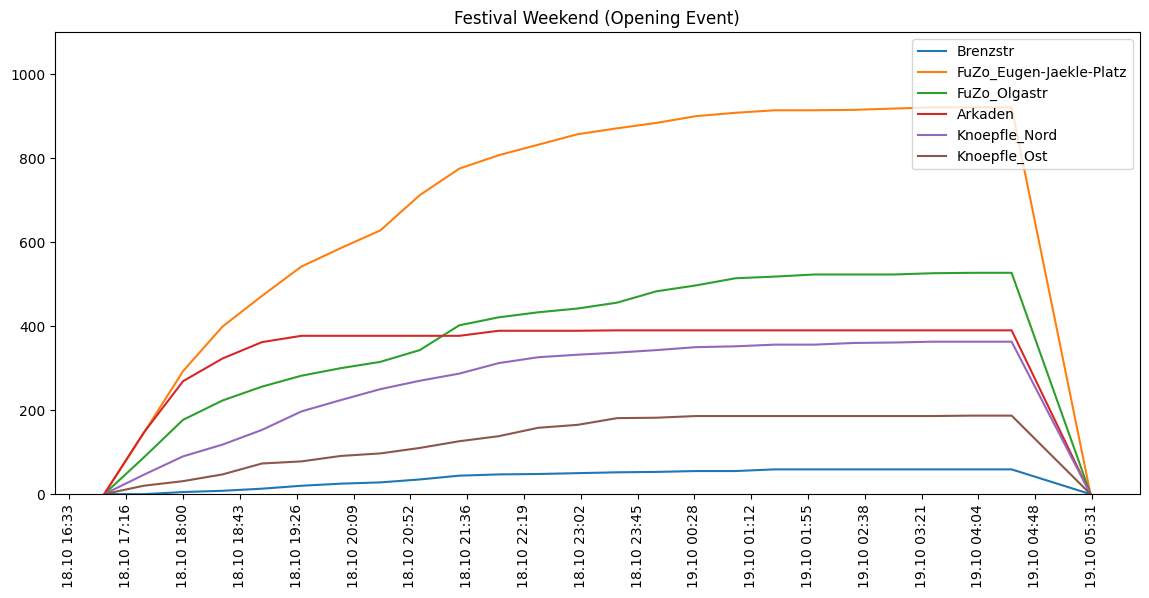

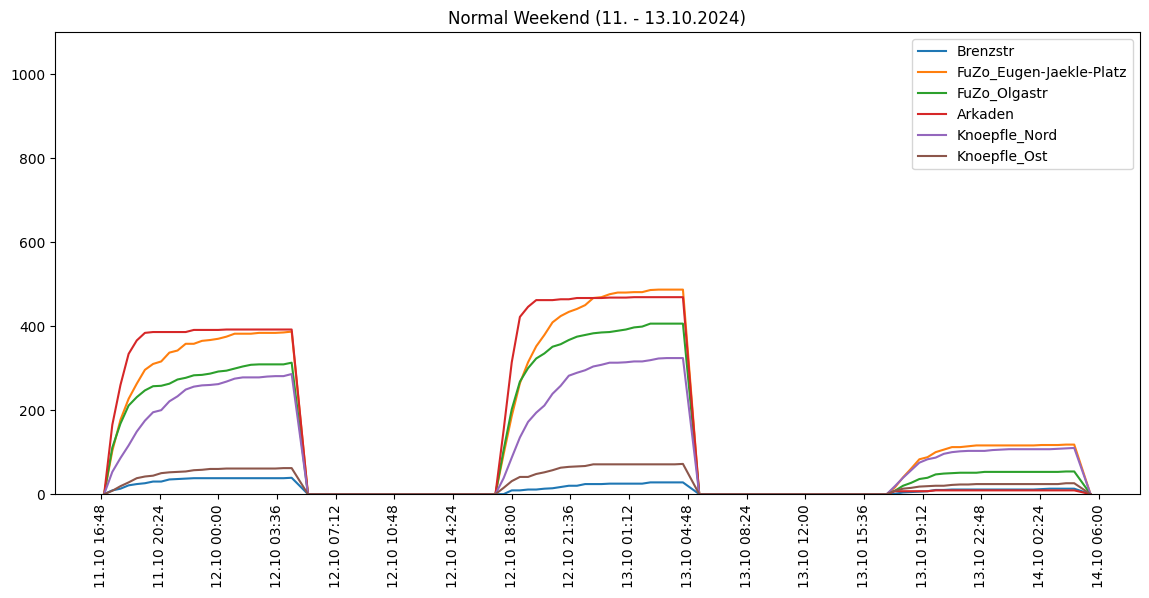

In [22]:
### 2024

plt.subplots(figsize=(14, 6))
for sensorName, data in sensorData.items():
    dataPoints = dict(sorted(data['singleDataPoints'].items())).values()

    dataPointsFestival1 = [d for d in dataPoints if filterDateRange(d, "2024-10-18 16:30:00", "2024-10-19 05:00:00")]
    dataPointsFestival1 = sumReducer(dataPointsFestival1, 'person.in')
    dataPointsFestival1.append({'datetime': '2024-10-19 05:30:00', 'person.in': 0})

    dataPointsFestival2 = [d for d in dataPoints if filterDateRange(d, "2024-10-19 16:30:00", "2024-10-20 05:00:00")]
    dataPointsFestival2 = sumReducer(dataPointsFestival2, 'person.in')
    dataPointsFestival2.append({'datetime': '2024-10-20 05:30:00', 'person.in': 0})

    dataPointsFestival3 = [d for d in dataPoints if filterDateRange(d, "2024-10-20 16:30:00", "2024-10-21 05:00:00")]
    dataPointsFestival3 = sumReducer(dataPointsFestival3, 'person.in')
    dataPointsFestival3.append({'datetime': '2024-10-21 05:30:00', 'person.in': 0})

    x = []
    y = []

    for dataPointsFestival in [dataPointsFestival1, dataPointsFestival2, dataPointsFestival3]:
        for dataPoint in dataPointsFestival:
            y.append(dataPoint['person.in'])
            datetimeValue = datetime.datetime.strptime(dataPoint['datetime'], '%Y-%m-%d %H:%M:%S')
            x.append(datetimeValue)

    plt.plot(x, y, label=sensorName)
    
plt.ylim(0, 1100)
leg = plt.legend(loc='upper right')
plt.title("Festival Weekend")

ax=plt.gca()
xfmt = md.DateFormatter('%d.%m %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=90)
plt.savefig('festival-weekend-2024.png', bbox_inches="tight")
plt.show()

### 2024 - the weekend bevore

plt.subplots(figsize=(14, 6))
for sensorName, data in sensorData.items():
    dataPoints = dict(sorted(data['singleDataPoints'].items())).values()

    dataPointsFestival1 = [d for d in dataPoints if filterDateRange(d, "2024-10-11 16:30:00", "2024-10-12 05:00:00")]
    dataPointsFestival1 = sumReducer(dataPointsFestival1, 'person.in')
    dataPointsFestival1.append({'datetime': '2024-10-12 05:30:00', 'person.in': 0})

    dataPointsFestival2 = [d for d in dataPoints if filterDateRange(d, "2024-10-12 16:30:00", "2024-10-13 05:00:00")]
    dataPointsFestival2 = sumReducer(dataPointsFestival2, 'person.in')
    dataPointsFestival2.append({'datetime': '2024-10-13 05:30:00', 'person.in': 0})

    dataPointsFestival3 = [d for d in dataPoints if filterDateRange(d, "2024-10-13 16:30:00", "2024-10-14 05:00:00")]
    dataPointsFestival3 = sumReducer(dataPointsFestival3, 'person.in')
    dataPointsFestival3.append({'datetime': '2024-10-14 05:30:00', 'person.in': 0})

    x = []
    y = []

    for dataPointsFestival in [dataPointsFestival1, dataPointsFestival2, dataPointsFestival3]:
        for dataPoint in dataPointsFestival:
            y.append(dataPoint['person.in'])
            datetimeValue = datetime.datetime.strptime(dataPoint['datetime'], '%Y-%m-%d %H:%M:%S')
            x.append(datetimeValue)

    plt.plot(x, y, label=sensorName)
    
plt.ylim(0, 1100)
leg = plt.legend(loc='upper right')
plt.title("Normal Weekend (11. - 13.10.2024)")

ax=plt.gca()
xfmt = md.DateFormatter('%d.%m %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=90)
plt.savefig('normal-weekend-2024.png', bbox_inches="tight")
plt.show()
